# Classification of motion imaging eeg signals based on wavelet transform and convolution neural network


## Data preprocessing


In [1]:
'''
MI_Wavelet_CNN
@zdl
reference paper:https://ieeexplore.ieee.org/document/8585027
DataSet BCI Competition III dataSet II 
MI task,binary classification 
x_train (1152,3,140)
x_test  (1152,3,140)
'''
import scipy.io as sio
import numpy as np
# load data 
import os
import pandas as pd
folder_path = r'/Users/manas/development/amloo/csv'
dataframes = []

# Iterate over the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('_filtered.csv'):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        
        df = pd.read_csv(file_path)
        
        dataframes.append(df)

# Name the DataFrames as df1, df2, df3, ..., df40 using a loop
for idx, df in enumerate(dataframes, start=1):
    globals()[f'df{idx}'] = df


In [2]:

# Loop through each DataFrame and rename the columns to "channel_1", "channel_2", etc.
for idx, df in enumerate(dataframes, start=1):
    column_mapping = {col: f'channel_{i}' for i, col in enumerate(df.columns, start=1)}
    df.rename(columns=column_mapping, inplace=True)



In [3]:
df38

,channel_1,channel_2,channel_3,channel_4
0,1.603377,-1.074978,-1.717807,-0.008398
1,1.602044,-1.074059,-1.717473,-0.007710
2,1.602660,-1.074742,-1.716927,-0.004729
3,1.603332,-1.076293,-1.715584,-0.000986
4,1.602578,-1.076551,-1.714210,0.000833
...,...,...,...,...
1279994,-0.011926,-0.000929,0.001227,-0.000536
1279995,-0.012530,-0.007226,0.000475,0.000564
1279996,-0.010873,-0.019241,-0.004620,0.001253
1279997,-0.014235,-0.038498,-0.010124,0.000677


/var/folders/8m/ppv1fzcs4jb75g2wbwfbl9w80000gn/T/ipykernel_16134/3897141794.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


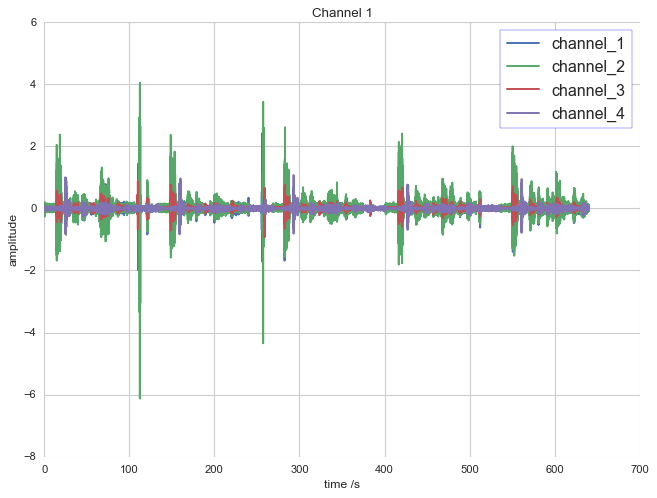

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_style("whitegrid")
# Define the sampling rate
sampleRate = 2000  # EEG sample rate

t = np.linspace(0, df1.shape[0] / sampleRate, df1.shape[0])

# Create a list of DataFrames
data_frames = [ df35  ]

plt.figure(figsize=(16, 12))


# Create subplots for each channel
for i, df in enumerate(data_frames, start=1):
    plt.subplot(2, 2, i)  # 2x2 grid of subplots
    for col in df.columns:
        plt.plot(t, df[col], label=col)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Channel {i}')
    plt.legend()

plt.tight_layout()  # Ensure proper layout of subplots
plt.xlabel('time /s')
plt.ylabel('amplitude')
plt.legend(loc='upper right',fontsize='large',frameon=True,edgecolor='blue') 
plt.show()  # Display the plot


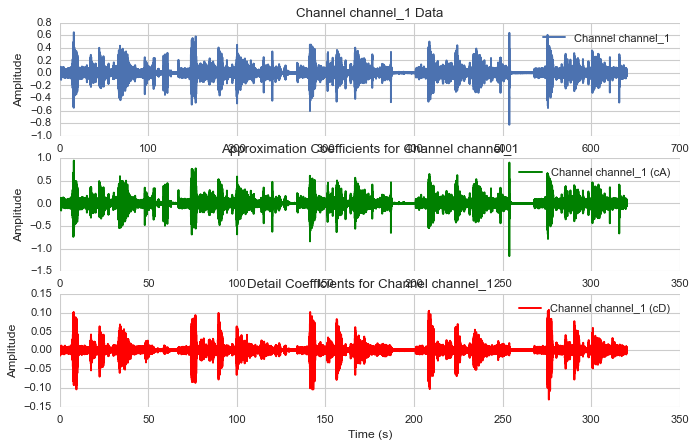

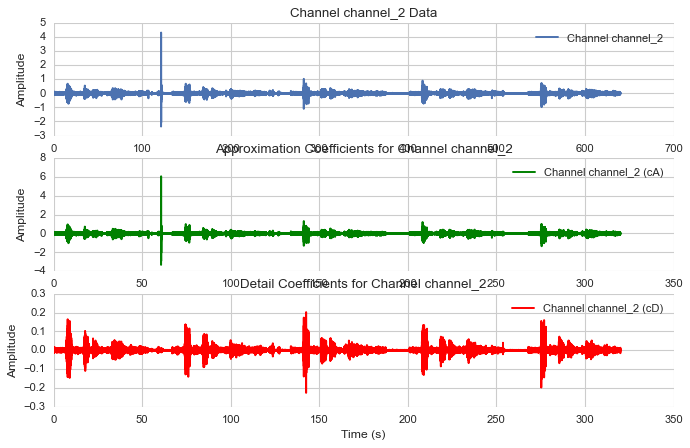

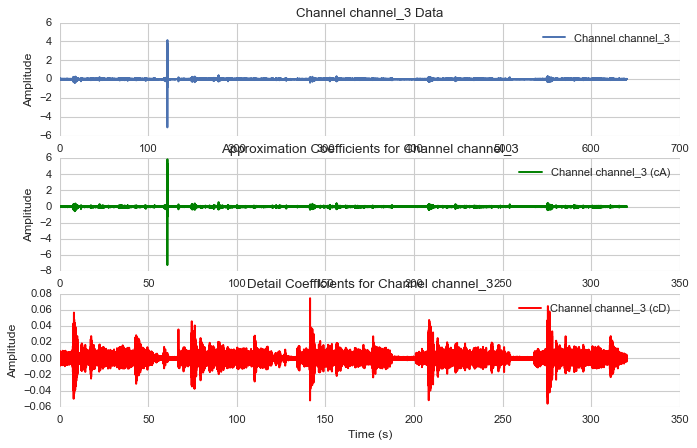

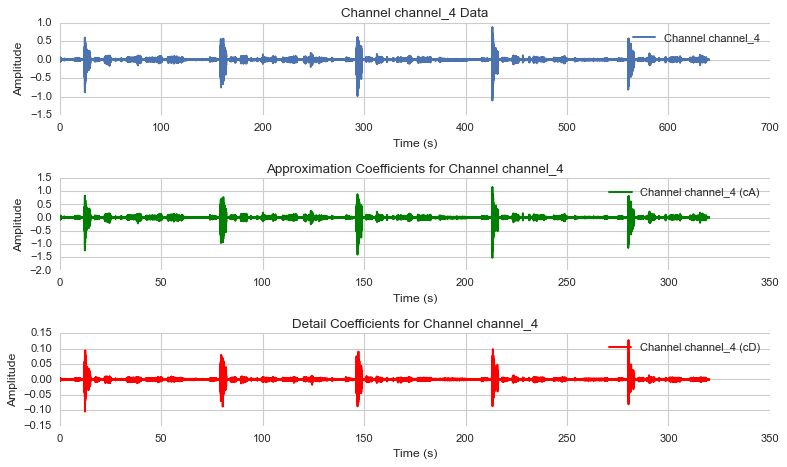

<Figure size 640x440 with 0 Axes>

<Figure size 640x440 with 0 Axes>

<Figure size 640x440 with 0 Axes>

In [13]:
import pywt
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")


# Initialize a list to store the subplots
subplots = []

# Create subplots for each channel
for col in df2.columns:
    cA, cD = pywt.dwt(df2[col], 'db4')
    
    # Create a new figure for each channel
    plt.figure(figsize=(10, 6))
    
    # Plot the original channel data
    plt.subplot(3, 1, 1)
    plt.plot(t, df2[col], label=f'Channel {col}')
    plt.title(f'Channel {col} Data')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()

    # Plot the approximation coefficients (cA)
    plt.subplot(3, 1, 2)
    plt.plot(t[:len(cA)], cA, '-g', label=f'Channel {col} (cA)')
    plt.title(f'Approximation Coefficients for Channel {col}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()

    # Plot the detail coefficients (cD)
    plt.subplot(3, 1, 3)
    plt.plot(t[:len(cD)], cD, '-r', label=f'Channel {col} (cD)')
    plt.title(f'Detail Coefficients for Channel {col}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()

    # Store the subplot
    subplots.append(plt)

# Display all subplots
for subplot in subplots:
    subplot.tight_layout()
    subplot.show()


### Wavelet Transfrom


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import os
import pandas as pd

# Set the plotting style
plt.style.use('classic')

# Sampling rate
sampling_rate = 2000

# Define the repetition coefficients
rep_coefficients = [4, 138, 272, 406, 540]  # In seconds

# Wavelet parameters
wavename = 'morl'
totalscal = 1000
fc = pywt.central_frequency(wavename)
cparam = 2 * fc * totalscal
scales = cparam / np.arange(1, totalscal + 1)

# Create a directory to save the images
output_directory = 'extracted_feature_images'  # Updated folder name
os.makedirs(output_directory, exist_ok=True)


for dataTrain_index, dataTrain in enumerate(dataTrain_list, start=1):
    dataTrain_output_directory = os.path.join(output_directory, f'dataTrain_{dataTrain_index}')
    os.makedirs(dataTrain_output_directory, exist_ok=True)

    # Loop through each repetition
    for rep in range(5):
        TimeStart = rep_coefficients[rep]
        TimeEnd = TimeStart + 6

        samplePointStart = int(TimeStart * sampling_rate)
        samplePointEnd = int(TimeEnd * sampling_rate)

        # Perform wavelet transform for all 4 channels
        for channel_number, channel_name in enumerate(dataTrain.columns, start=1):
            data = dataTrain[channel_name].iloc[samplePointStart:samplePointEnd]

            t = np.arange(TimeStart, TimeEnd, 1.0 / sampling_rate)

            # Perform wavelet transform
            [cwtmatr, frequencies] = pywt.cwt(data.values, scales, wavename, 1.0 / sampling_rate)

            # Create a single image for each repetition and each channel
            fig = plt.figure()
            plt.contourf(t, frequencies, abs(cwtmatr))
            plt.ylabel("Frequency (Hz)")
            plt.xlabel("Time (s)")
            plt.colorbar()
            plt.title(f'Wavelet Transform - DataTrain {dataTrain_index}, Repetition {rep + 1}, Channel {channel_number}')

            filepath = os.path.join(dataTrain_output_directory, f'Channel_{channel_number}_Rep_{rep + 1}.jpg')
            os.makedirs(os.path.dirname(filepath), exist_ok=True)  # Create subdirectories as needed
            fig.savefig(filepath, bbox_inches='tight')
            plt.close()

print('Wavelet transform completed. Images are saved in the "extracted_feature_images" folder.')


NameError: name 'dataTrain_list' is not defined

Class of continuous wavelet functions:
['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']


KeyboardInterrupt: 

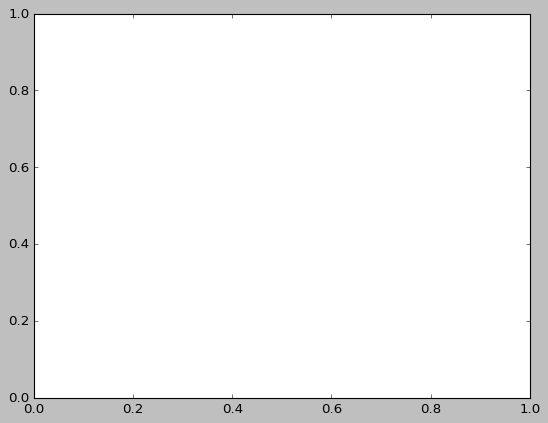

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Set the plotting style
plt.style.use('classic')

# List available continuous wavelet functions
wavlist = pywt.wavelist(kind='continuous')
print("Class of continuous wavelet functions:")
print(wavlist)

# Sampling rate
sampling_rate = 2000

# Time array
t = np.arange(0, df2.shape[0], 1.0)  # Assuming df2 is a DataFrame with appropriate dimensions

# Wavelet name
wavename = 'morl'  # You can choose a different wavelet if needed

# Total scales
totalscal = 1000

# Calculate central frequency
fc = pywt.central_frequency(wavename)
cparam = 2 * fc * totalscal
scales = cparam / np.arange(1, totalscal + 1)

# Create a directory to save the images
import os
output_directory = 'wavelet_images'
os.makedirs(output_directory, exist_ok=True)

# Perform CWT for the first column ("channel_1") in df2 and save the plot as an image
column_name = df2.columns[0]  # Assuming the first column is named "channel_1"
channel_data = df2[column_name]
[cwtmatr, frequencies] = pywt.cwt(channel_data, scales, wavename, 1.0 / sampling_rate)

# Create a figure for the time-frequency plot
plt.figure()
plt.contourf(t, frequencies, abs(cwtmatr))
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")
plt.colorbar()
plt.title(f'{column_name} - Time-Frequency Plot')

# Save the figure as an image
image_filename = os.path.join(output_directory, f'{column_name}_time_frequency.png')
plt.savefig(image_filename, bbox_inches='tight')
plt.close()  # Close the figure to release memory

print(f"Time-frequency plot for {column_name} saved as an image in the '{output_directory}' directory.")



## Feature Extraction


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import os
import pandas as pd

# Set the plotting style
plt.style.use('classic')

# Sampling rate
sampling_rate = 2000

# Define the repetition coefficients
rep_coefficients = [4, 138, 272, 406, 540]  # In seconds

# Wavelet parameters
wavename = 'morl'
totalscal = 1000
fc = pywt.central_frequency(wavename)
cparam = 2 * fc * totalscal
scales = cparam / np.arange(1, totalscal + 1)

# Create a directory to save the images
output_directory = 'extracted_feature_images'  # Updated folder name
os.makedirs(output_directory, exist_ok=True)

# List of dataTrain data frames
dataTrain_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11,
                  df12, df13, df14, df15, df16, df17, df18, df19, df20,
                  df21, df22, df23, df24, df25, df26, df27, df28, df29, df30,
                  df31, df32, df33, df34, df35, df36, df37, df38, df39, df40]  # Add all your dataTrain data frames here

def folder_exists(folder_path):
    return os.path.exists(folder_path) and os.path.isdir(folder_path)

for dataTrain_index, dataTrain in enumerate(dataTrain_list, start=1):
    dataTrain_output_directory = os.path.join(output_directory, f'dataTrain_{dataTrain_index}')
    
    if folder_exists(dataTrain_output_directory):
        print(f"Skipping DataTrain {dataTrain_index}. Folder already exists.")
        continue
    
    os.makedirs(dataTrain_output_directory, exist_ok=True)

    # Loop through each repetition
    for rep in range(5):
        TimeStart = rep_coefficients[rep]
        TimeEnd = TimeStart + 6

        samplePointStart = int(TimeStart * sampling_rate)
        samplePointEnd = int(TimeEnd * sampling_rate)

        # Perform wavelet transform for all 4 channels
        for channel_number, channel_name in enumerate(dataTrain.columns, start=1):
            data = dataTrain[channel_name].iloc[samplePointStart:samplePointEnd]

            t = np.arange(TimeStart, TimeEnd, 1.0 / sampling_rate)

            # Perform wavelet transform
            [cwtmatr, frequencies] = pywt.cwt(data.values, scales, wavename, 1.0 / sampling_rate)

            # Create a single image for each repetition and each channel
            fig = plt.figure()
            plt.contourf(t, frequencies, abs(cwtmatr))
            plt.ylabel("Frequency (Hz)")
            plt.xlabel("Time (s)")
            plt.colorbar()
            plt.title(f'Wavelet Transform - DataTrain {dataTrain_index}, Repetition {rep + 1}, Channel {channel_number}')

            filepath = os.path.join(dataTrain_output_directory, f'Channel_{channel_number}_Rep_{rep + 1}.jpg')
            os.makedirs(os.path.dirname(filepath), exist_ok=True)  # Create subdirectories as needed
            fig.savefig(filepath, bbox_inches='tight')
            plt.close()

print('Wavelet transform completed. Images are saved in the "extracted_feature_images" folder.')


Skipping DataTrain 1. Folder already exists.
Skipping DataTrain 2. Folder already exists.
Skipping DataTrain 3. Folder already exists.
Skipping DataTrain 4. Folder already exists.
Skipping DataTrain 5. Folder already exists.
Skipping DataTrain 6. Folder already exists.
Skipping DataTrain 7. Folder already exists.
Skipping DataTrain 8. Folder already exists.
Skipping DataTrain 10. Folder already exists.
Skipping DataTrain 11. Folder already exists.
Skipping DataTrain 12. Folder already exists.
Skipping DataTrain 13. Folder already exists.
Skipping DataTrain 14. Folder already exists.
Skipping DataTrain 15. Folder already exists.
Skipping DataTrain 16. Folder already exists.
Skipping DataTrain 17. Folder already exists.
Skipping DataTrain 19. Folder already exists.
Skipping DataTrain 20. Folder already exists.
Skipping DataTrain 21. Folder already exists.
Skipping DataTrain 22. Folder already exists.
Skipping DataTrain 23. Folder already exists.
Skipping DataTrain 24. Folder already exis

# CNN model

- the network model is smaller with fewer convolutional layers
- one dimensional convolution kernel and two dimensional convolution kernel are used
- innovatively add batch normalized processing data BN
- Keras built the network

## train dataset description

- X_Train train data 280 samples
- Y_Train train label


## CNN Classification


In [29]:
import os
import numpy as np
import tensorflow as tf

def get_file(directory):
    dataTrain = []
    labelTrain = []

    # Mapping from folder name to label (assuming folder names are integers)
    label_mapping = {}

    # Iterate over the subdirectories inside the directory
    for label, subdir in enumerate(sorted(os.listdir(directory))):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            label_mapping[subdir] = label

            # Iterate over the JPG files inside the subdirectory
            for file in os.listdir(subdir_path):
                if file.endswith('.jpg'):
                    dataTrain.append(os.path.join(subdir_path, file))
                    labelTrain.append(label)

    temp = np.array([dataTrain, labelTrain])
    temp = np.transpose(temp)
    np.random.shuffle(temp)
    image_list = temp[:, 0]
    label_list = temp[:, 1]
    label_list = [int(i) for i in label_list]
    return image_list, label_list

# Specify the directory you want to work with (current directory)
current_directory = os.getcwd()
folder_name = 'feature-extraction-images'
folder_path = os.path.join(current_directory, folder_name)

# Check if the folder exists
if os.path.exists(folder_path) and os.path.isdir(folder_path):
    image_list, label_list = get_file(folder_path)
else:
    print(f"The folder '{folder_name}' does not exist in the current directory.")


In [61]:
import os
import numpy as np
import tensorflow as tf

def get_file(directory):
    dataTrain = []
    labelTrain = []
    label_mapping = {}  # Map labels to unique integers
    label_counter = 0

    # Iterate over the JPG files directly in the directory
    for file in os.listdir(directory):
        if file.endswith('.jpg'):
            dataTrain.append(os.path.join(directory, file))
            # Extract labels from the filename
            filename_parts = file.split('_')
            if len(filename_parts) == 5 and filename_parts[0]==('Channel') and filename_parts[2] == ('Rep'):
                channel_number = filename_parts[1]
                repetition_number = filename_parts[3]
                label = f'Channel_{channel_number}_Rep_{repetition_number}'
                
                # Check if the label is already in the mapping
                if label not in label_mapping:
                    label_mapping[label] = label_counter
                    label_counter += 1

                labelTrain.append(label_mapping[label])

    if not dataTrain:
        print("No JPG image files found in the specified directory.")
        return np.array([]), np.array([])  # Return empty arrays
    else:
        return np.array(dataTrain), np.array(labelTrain, dtype=np.int32)

# Specify the directory you want to work with (current directory)
current_directory = os.getcwd()
folder_name = 'feature-extraction-images'
folder_path = os.path.join(current_directory, folder_name)

# Check if the folder exists
if os.path.exists(folder_path) and os.path.isdir(folder_path):
    image_list, label_list = get_file(folder_path)
else:
    print(f"The folder '{folder_name}' does not exist in the current directory or is not accessible.")


In [72]:
import os
import numpy as np
import tensorflow as tf
import re

def get_file(directory):
    dataTrain = []
    labelTrain = []
    label_mapping = {}  # Map labels to unique integers
    label_counter = 0

    # Regular expression pattern for matching filenames
    pattern = r'Channel_(\d+)_Rep_(\d+)'

    # Iterate over the JPG files directly in the directory
    for file in os.listdir(directory):
        if file.endswith('.jpg'):
            dataTrain.append(os.path.join(directory, file))

            # Extract labels using regular expression
            match = re.search(pattern, file)
            if match:
                channel_number = match.group(1)
                repetition_number = match.group(2)
                label = f'Channel_{channel_number}_Rep_{repetition_number}'

                # Check if the label is already in the mapping
                if label not in label_mapping:
                    label_mapping[label] = label_counter
                    label_counter += 1

                labelTrain.append(label_mapping[label])

    if not dataTrain:
        print("No JPG image files found in the specified directory.")
        return np.array([]), np.array([])  # Return empty arrays
    else:
        return np.array(dataTrain), np.array(labelTrain, dtype=np.int32)

# Specify the directory you want to work with (current directory)
current_directory = os.getcwd()
folder_name = 'feature-extraction-images'
folder_path = os.path.join(current_directory, folder_name)

# Check if the folder exists
if os.path.exists(folder_path) and os.path.isdir(folder_path):
    image_list, label_list = get_file(folder_path)
else:
    print(f"The folder '{folder_name}' does not exist in the current directory or is not accessible.")


In [73]:
label_list

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int32)

(570, 707, 3)


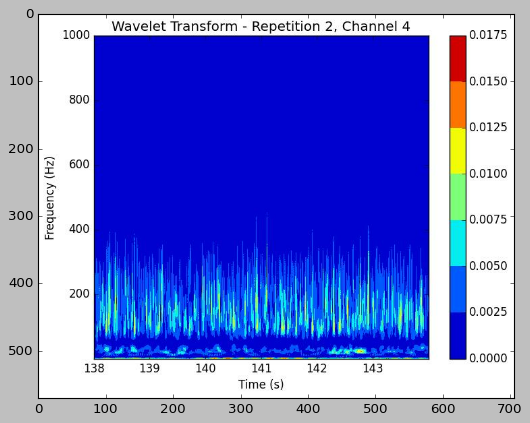

In [74]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Read binary data
image_raw = tf.io.gfile.GFile(image_list[10], 'rb').read()

# Decode the image using tf.image.decode_jpeg
img = tf.image.decode_jpeg(image_raw)  # Tensor

# Start a TensorFlow session to evaluate the image
with tf.compat.v1.Session() as sess:  # For TensorFlow 2.x, you can omit tf.compat.v1
    img_ = img.numpy()  # Equivalent to sess.run(img)
    print(img_.shape)

# Display the image using matplotlib
plt.figure(1)
plt.imshow(img_)
plt.show()


In [77]:
# read train data  figure-->tensor
# read_file 
# decode_jpeg
X = np.empty([280,64,64,3])
with tf.compat.v1.Session() as sess:
    for i in range(len(image_list)):
        # 读取图像文件
        image_raw_data = tf.io.gfile.GFile(image_list[i],'rb').read() 
        # 将图像文件解码为tensor
        image_data = tf.image.decode_jpeg(image_raw_data)
        # 改变张量的形状
        resized = tf.image.resize(image_data, [64,64])  
        resized = np.asarray(resized.eval(),dtype='uint8')      # asarray 生成数组 深拷贝不复制对象   .eval()等价于 sess.run(resized)
        X[i,:,:,:]=resized  

# train data
X_Train = X[:,:,:,:]
Y = np.subtract(np.array(label_list), 1)
Y = Y.reshape([280,1])
V = tf.one_hot(Y, depth=2,axis=1,dtype=tf.float32)
session = tf.compat.v1.Session()
Y_Train = session.run(V)
session.close()
# resize
Y_Train = Y_Train.reshape([280,2])
#  normalization
X_Train = X_Train/255.
print ("X_Train shape: " + str(X_Train.shape))
print ("Y_Train shape: " + str(Y_Train.shape))

AttributeError: Tensor.graph is undefined when eager execution is enabled.

In [79]:
tf.compat.v1.disable_eager_execution()

X = np.empty([len(image_list), 64, 64, 3])

with tf.compat.v1.Session() as sess:
    for i, image_path in enumerate(image_list):
        # Read image file
        image_raw_data = tf.io.gfile.GFile(image_path, 'rb').read()

        # Decode image as tensor
        image_data = tf.image.decode_jpeg(image_raw_data)

        # Resize tensor
        resized = tf.image.resize(image_data, [64, 64])

        # Evaluate and convert to NumPy array
        resized = np.asarray(resized.eval(), dtype='uint8')

        X[i, :, :, :] = resized

# Prepare training data
X_Train = X / 255.0  # Normalize pixel values to [0, 1]

# Encode labels as one-hot vectors
num_classes = len(np.unique(label_list))
Y = np.subtract(label_list, 1)
Y_Train = tf.one_hot(Y, depth=num_classes, axis=1, dtype=tf.float32)

# Start a TensorFlow session
with tf.compat.v1.Session() as session:
    Y_Train = session.run(Y_Train)

print("X_Train shape:", X_Train.shape)
print("Y_Train shape:", Y_Train.shape)

X_Train shape: (20, 64, 64, 3)
Y_Train shape: (20, 20)


In [84]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D

input_shape = X_Train.shape[1:]
num_classes = 2

model = Sequential()

model.add(Conv2D(16, (4, 4), padding='same', input_shape=input_shape, kernel_initializer='he_normal', name='conv2d_1'))
model.add(Activation('relu', name='activation_1'))
model.add(MaxPooling2D(pool_size=(8, 8), name='maxpool2d_1'))
model.add(Dropout(0.25, name='dropout_1'))

model.add(Conv2D(32, (4, 4), padding='same', kernel_initializer='he_normal', name='conv2d_2'))
model.add(Activation('relu', name='activation_2'))
model.add(MaxPooling2D(pool_size=(2, 2), name='maxpool2d_2'))
model.add(Dropout(0.25, name='dropout_2'))

model.add(Flatten(name='flatten_1'))
model.add(Dense(240, kernel_initializer='he_normal', name='dense_1'))
model.add(Activation('relu', name='activation_3'))
model.add(Dropout(0.5, name='dropout_3'))
model.add(Dense(num_classes, kernel_initializer='he_normal', name='dense_2'))
model.add(Activation('softmax', name='activation_4'))
model.summary()

# Optimizer
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0003, decay=1e-6)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        784       
                                                                 
 activation_1 (Activation)   (None, 64, 64, 16)        0         
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 8, 8, 16)          0         
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 16)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          8224      
                                                                 
 activation_2 (Activation)   (None, 8, 8, 32)          0         
                                                                 
 maxpool2d_2 (MaxPooling2D)  (None, 4, 4, 32)         

In [85]:
# train model
epochs = 300
history = model.fit(X_Train, Y_Train, shuffle=True, batch_size=8, epochs=epochs, verbose=1, validation_split=0.3)

ValueError: A target array with shape (20, 20) was passed for an output of shape (None, 2) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

In [ ]:

# cross validation
'''
#learning_rate = 0.01,num_epochs = 500, minibatch_size = 16
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
skf=StratifiedKFold(n_splits=5)
skf.get_n_splits(X,b)
print(skf)
for train_index,test_index in skf.split(X,b):
    #print("Train Index:",train_index,",Test Index:",test_index)
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=Y[train_index],Y[test_index]
    
    X_train = X_train/255.
    X_test = X_test/255.
    print ("number of training examples = " + str(X_train.shape[0]))
    print ("number of test examples = " + str(X_test.shape[0]))
#     print ("X_train shape: " + str(X_train.shape))
#     print ("Y_train shape: " + str(y_train.shape))
#     print ("X_test shape: " + str(X_test.shape))
#     print ("Y_test shape: " + str(y_test.shape))
    
    _, _, parameters = model(X_train, y_train, X_test, y_test)
    
    
    with open('2003.pkl','rb') as f:
            pred=pickle.load(f)
            
    true=np.argmax(y_test,1)+1
    confusion_matrix(true,pred)
    print(classification_report(true,pred))
'''


'#交叉验证\n#learning_rate = 0.01,num_epochs = 500, minibatch_size = 16\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.metrics import confusion_matrix, classification_report\nskf=StratifiedKFold(n_splits=5)\nskf.get_n_splits(X,b)\nprint(skf)\nfor train_index,test_index in skf.split(X,b):\n    #print("Train Index:",train_index,",Test Index:",test_index)\n    X_train,X_test=X[train_index],X[test_index]\n    y_train,y_test=Y[train_index],Y[test_index]\n    \n    X_train = X_train/255.\n    X_test = X_test/255.\n    print ("number of training examples = " + str(X_train.shape[0]))\n    print ("number of test examples = " + str(X_test.shape[0]))\n#     print ("X_train shape: " + str(X_train.shape))\n#     print ("Y_train shape: " + str(y_train.shape))\n#     print ("X_test shape: " + str(X_test.shape))\n#     print ("Y_test shape: " + str(y_test.shape))\n    \n    _, _, parameters = model(X_train, y_train, X_test, y_test)\n    \n    \n    with open(\'2003.pkl\',\'rb\') as f:\

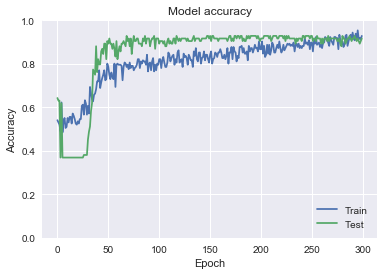

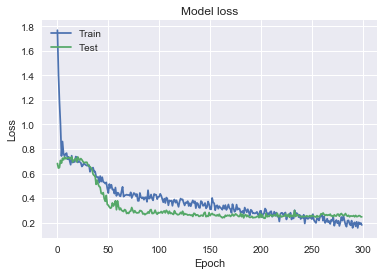

In [ ]:
#  Visualization of training process
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(0)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim(0,1)

plt.figure(1)
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

